# Unsupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [28]:
# Load the dataset
df = pd.read_csv("E:\Vocational\Lighthouse Labs\Flex Course\Projects\P04_Unsupervised Learning\ml_project_unsupervised_learning\data\Wholesale_Data.csv")

In [29]:
# Display column names
print("Columns in the dataset:", df.columns)

Columns in the dataset: Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [30]:
# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [31]:
# Outlier Detection and Treatment
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
# Summary statistics
summary_stats = df.describe()
print("Summary statistics:\n", summary_stats)

Summary statistics:
           Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000     

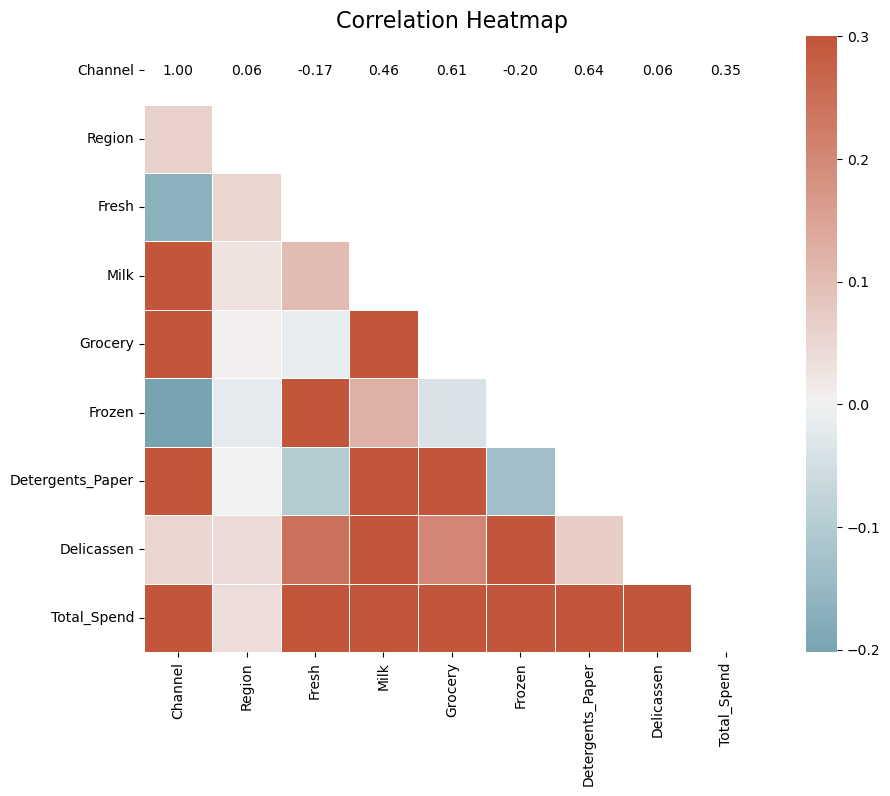

In [26]:
# Calculate the correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=corr, fmt=".2f", annot_kws={"size": 10, "color": "black"})

ax.set_title('Correlation Heatmap', fontsize=16)
plt.show()

### Interpretation of the Correlation Heatmap:

1. **Channel:**
   - The `Channel` variable has a moderate positive correlation with `Milk` (0.46) and `Grocery` (0.61), suggesting that certain channels might be associated with higher spending on these categories.
   - There is a strong positive correlation with `Detergents_Paper` (0.64), indicating that the sales channel significantly influences spending on Detergents_Paper.
   - There is a weak negative correlation with `Frozen` (-0.20), indicating that the sales channel slightly influences lower spending on Frozen products.

2. **Region:**
   - `Region` shows low correlations with all other variables, suggesting that the geographical region doesn't significantly affect spending patterns on these categories.

3. **Fresh:**
   - `Fresh` has a moderate positive correlation with `Frozen` (0.35) and a weak positive correlation with `Delicassen` (0.24), indicating that customers who spend more on Fresh products also tend to spend more on Frozen and Delicassen products.
   - It has a very weak negative correlation with `Detergents_Paper` (-0.10), suggesting a slight tendency for those who spend more on Fresh products to spend less on Detergents_Paper.

4. **Milk:**
   - `Milk` shows a strong positive correlation with `Grocery` (0.73) and `Detergents_Paper` (0.66), suggesting that customers who spend more on Milk also spend more on Grocery and Detergents_Paper.
   - There is a moderate positive correlation with `Delicassen` (0.51), indicating that higher Milk spenders also tend to spend more on Delicassen.

5. **Grocery:**
   - `Grocery` has a strong positive correlation with `Detergents_Paper` (0.92), indicating that spending patterns on these two categories are highly related. Customers who spend more on Grocery items almost certainly spend more on Detergents_Paper.
   - Moderate positive correlations with `Milk` (0.73) and `Delicassen` (0.45) suggest that higher Grocery spenders also spend more on these categories.

6. **Frozen:**
   - `Frozen` has weak to moderate positive correlations with other categories, with the highest being with `Fresh` (0.35) and `Delicassen` (0.25), suggesting some relationship in spending patterns.

7. **Detergents_Paper:**
   - Besides the very high correlation with `Grocery` (0.92), `Detergents_Paper` shows moderate positive correlations with `Milk` (0.66) and `Delicassen` (0.41), indicating similar spending patterns.

8. **Delicassen:**
   - `Delicassen` shows moderate positive correlations with several categories, including `Milk` (0.51), `Grocery` (0.45), and `Detergents_Paper` (0.41), indicating that higher spenders on Delicassen also tend to spend more on these categories.

9. **Total_Spend:**
   - `Total_Spend` shows high positive correlations with all individual spending categories, particularly with `Grocery` (0.85), `Milk` (0.72), and `Detergents_Paper` (0.60), as expected since it is the sum of all these categories.

### Summary:
- **Strong Correlations:** `Grocery` and `Detergents_Paper` (0.92), indicating a very high similarity in spending patterns.
- **Moderate Correlations:** Various moderate positive correlations indicate some related spending behavior across different product categories.
- **Weak or No Correlation:** `Region` and `Channel` with most categories, indicating these variables do not strongly influence spending patterns.

This heatmap helps identify which product categories have similar spending patterns and can provide insights into customer behavior, potentially guiding marketing and sales strategies.

#### Hypotheses:
1. **Hypothesis 1**: Customers with high spending on `Fresh` products also tend to spend more on other categories.
2. **Hypothesis 2**: There are distinct segments of customers based on their spending in `Milk` and `Grocery`.
3. **Hypothesis 3**: Customers with high spending on `Detergents_Paper` also have high overall spending.

#### Hypothesis 1: Customers with high spending on `Fresh` products also tend to spend more on other categories

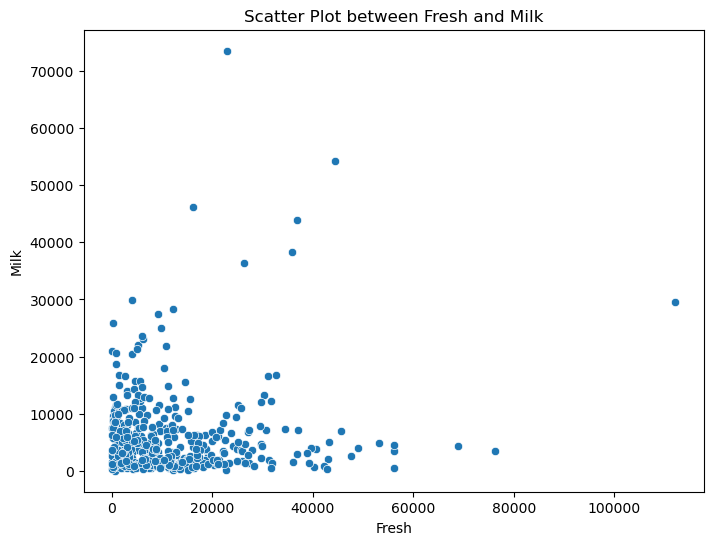

Correlation between Fresh and Milk: 0.10


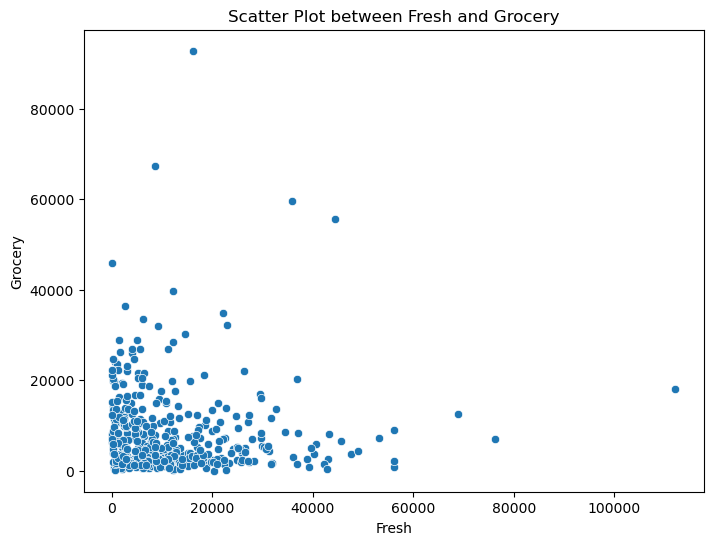

Correlation between Fresh and Grocery: -0.01


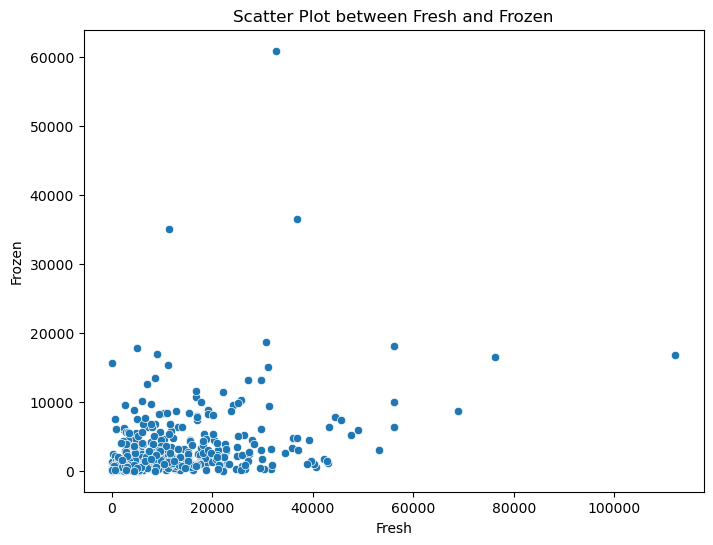

Correlation between Fresh and Frozen: 0.35


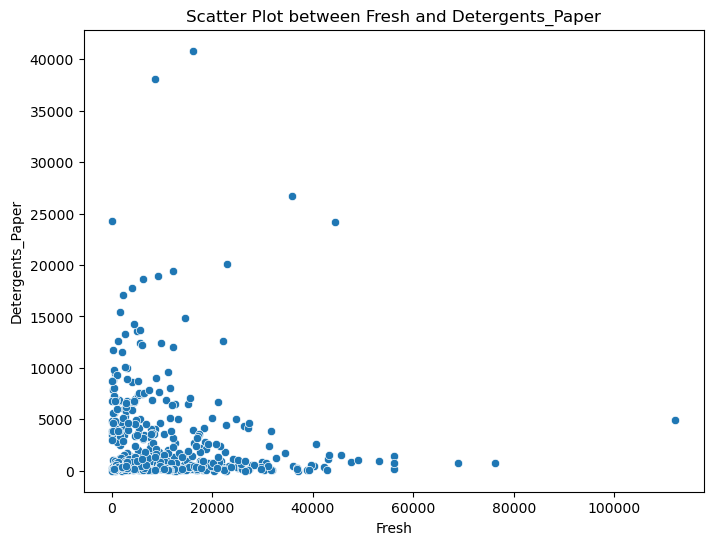

Correlation between Fresh and Detergents_Paper: -0.10


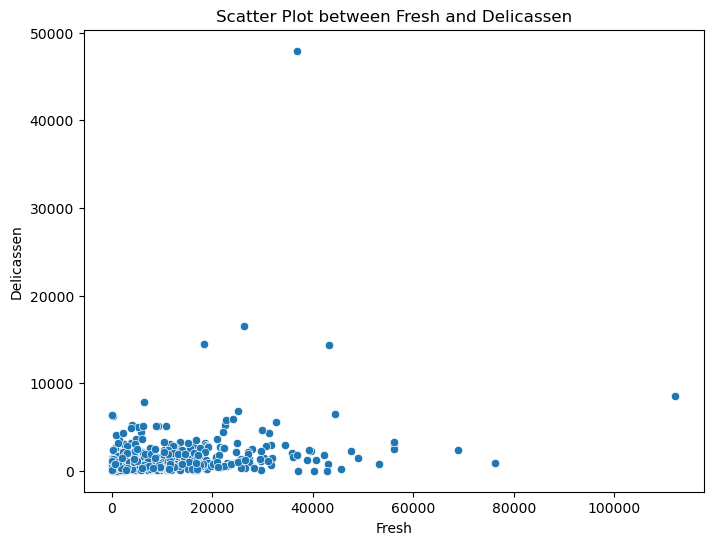

Correlation between Fresh and Delicassen: 0.24


In [21]:
# Scatter plots and correlation coefficients for Fresh vs other categories
for column in ['Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Fresh', y=column, data=df)
    plt.title(f'Scatter Plot between Fresh and {column}')
    plt.show()
    correlation = df['Fresh'].corr(df[column])
    print(f"Correlation between Fresh and {column}: {correlation:.2f}")

**Interpretation of Correlation Results:**

1. **Correlation between Fresh and Milk: 0.10**
   - A correlation of 0.10 indicates a very weak positive relationship between spending on Fresh products and Milk. 
   - This suggests that customers who spend more on Fresh products might slightly tend to spend more on Milk, but the relationship is not strong.

2. **Correlation between Fresh and Grocery: -0.01**
   - A correlation of -0.01 indicates almost no relationship between spending on Fresh products and Grocery. 
   - This suggests that spending on Fresh products does not have a meaningful impact on how much customers spend on Grocery items.

3. **Correlation between Fresh and Frozen: 0.35**
   - A correlation of 0.35 indicates a low-to-moderate positive relationship between spending on Fresh products and Frozen items. 
   - This suggests that customers who spend more on Fresh products tend to also spend more on Frozen products, but the relationship is not very strong.

4. **Correlation between Fresh and Detergents_Paper: -0.10**
   - A correlation of -0.10 indicates a very weak negative relationship between spending on Fresh products and Detergents_Paper. 
   - This suggests that customers who spend more on Fresh products might slightly tend to spend less on Detergents_Paper, but again, the relationship is very weak.

5. **Correlation between Fresh and Delicassen: 0.24**
   - A correlation of 0.24 indicates a weak positive relationship between spending on Fresh products and Delicassen items. 
   - This suggests that customers who spend more on Fresh products tend to also spend a bit more on Delicassen products, but the relationship is not strong.

### Conclusion:
The correlations suggest that there is no strong relationship between spending on Fresh products and spending on other product categories. The only moderate correlation is between Fresh and Frozen (0.35), indicating some customers who spend more on Fresh items also spend more on Frozen items. This analysis indicates that the hypothesis is not strongly supported by the data. 

#### Hypothesis 2: There are distinct segments of customers based on their spending in `Milk` and `Grocery`

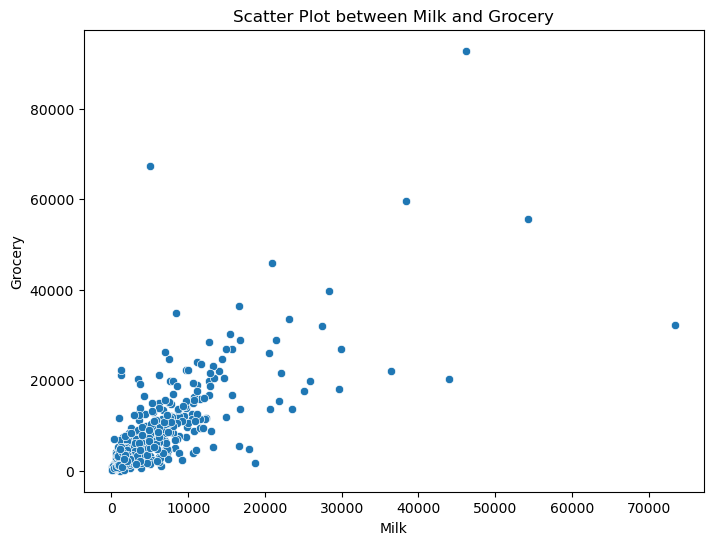

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Milk', y='Grocery', data=df)
plt.title('Scatter Plot between Milk and Grocery')
plt.show()

**Scatter Plot Interpretation:**

1. **General Trend:**
   - The scatter plot shows a positive relationship between spending on Milk and Grocery. As the spending on Milk increases, the spending on Grocery also tends to increase. This positive trend indicates that customers who spend more on Milk are likely to spend more on Grocery items as well.

2. **Data Distribution:**
   - A large cluster of data points is concentrated at the lower end of both axes, indicating that most customers have relatively low spending on both Milk and Grocery.
   - There are several outliers with high spending on both categories, but these are less common. These outliers suggest the presence of some high-spending customers who purchase large amounts of both Milk and Grocery items.

3. **Potential Segments:**
   - The dense cluster of points at the lower end suggests a segment of customers with low spending on both Milk and Grocery.
   - The spread of points suggests that there might be another segment of customers with varying degrees of higher spending on Milk and Grocery.
   - The few outliers with very high spending might represent a small, distinct segment of high-value customers who spend significantly more on both categories.

4. **Variability:**
   - There is considerable variability in spending patterns, especially as the spending amounts increase. This variability indicates that while there is a general trend, individual customer behavior can differ widely.

### Conclusion:
The scatter plot supports the hypothesis that there are distinct segments of customers based on their spending in Milk and Grocery. The majority of customers spend relatively small amounts on both categories, but there are segments of higher spenders and a few high-value customers. These segments could be targeted differently in marketing strategies to optimize sales and customer engagement.

#### Hypothesis 3: Customers with high spending on `Detergents_Paper` also have high overall spending

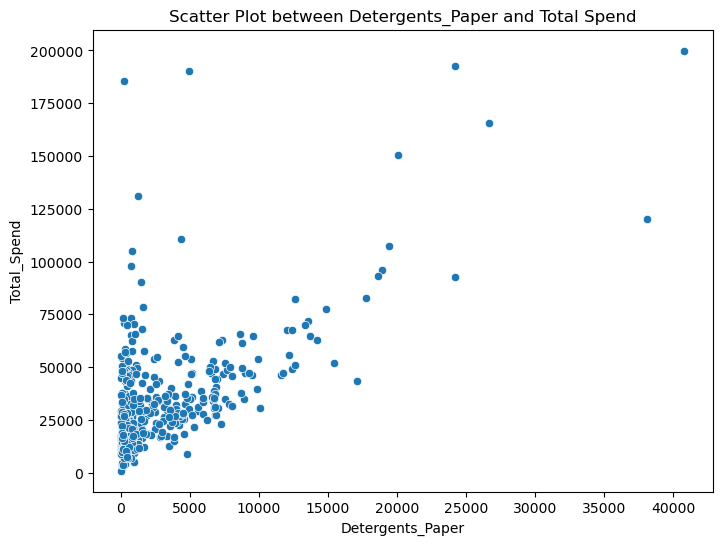

In [23]:
# Create a Total_Spend column
df['Total_Spend'] = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Detergents_Paper', y='Total_Spend', data=df)
plt.title('Scatter Plot between Detergents_Paper and Total Spend')
plt.show()

**Scatter Plot Interpretation:**

1. **General Trend:**
   - The scatter plot shows a positive relationship between spending on Detergents_Paper and Total_Spend. As spending on Detergents_Paper increases, the overall spending also tends to increase. This positive trend indicates that customers who spend more on Detergents_Paper are likely to have higher total spending.

2. **Data Distribution:**
   - A large cluster of data points is concentrated at the lower end of both axes, indicating that most customers have relatively low spending on Detergents_Paper and overall spending.
   - There are several outliers with high spending on both Detergents_Paper and Total_Spend. These outliers suggest the presence of some high-spending customers who purchase large amounts of Detergents_Paper and have high overall spending.

3. **Potential Segments:**
   - The dense cluster of points at the lower end suggests a segment of customers with low spending on both Detergents_Paper and overall spending.
   - The spread of points suggests another segment of customers with varying degrees of higher spending on Detergents_Paper and total spending.
   - The few outliers with very high spending on both axes might represent a small, distinct segment of high-value customers who spend significantly more overall.

4. **Variability:**
   - There is considerable variability in spending patterns, especially as the spending amounts increase. This variability indicates that while there is a general trend, individual customer behavior can differ widely.

### Conclusion:
The scatter plot supports the hypothesis that customers with high spending on Detergents_Paper also have high overall spending. The majority of customers spend relatively small amounts on both Detergents_Paper and overall, but there are segments of higher spenders and a few high-value customers. This analysis suggests that targeting customers who spend more on Detergents_Paper might be an effective strategy to identify high-value customers with significant overall spending.

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [51]:
# Pre-process the dataset
numeric_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_numeric = df[numeric_cols]

In [28]:
# Standardize the data
scaler = StandardScaler()
df = scaler.fit_transform(df_numeric)

In [29]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

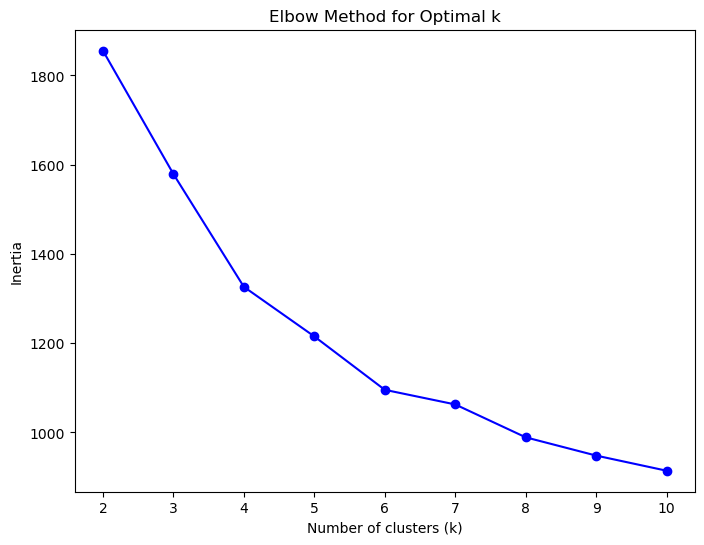

In [30]:
# plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Identifying the Elbow
In the plot, the "elbow" appears to be around **k = 3**. Here’s why:
- Up to k = 3, there is a significant reduction in inertia with each additional cluster.
- After k = 3, the rate of decrease in inertia diminishes, indicating that adding more clusters beyond this point yields marginal gains in clustering quality.

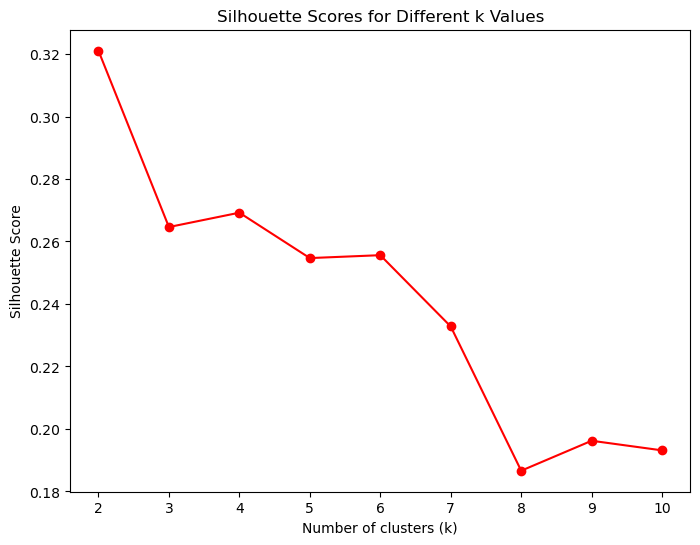

In [31]:
# plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.show()

In [33]:
# initialize and fit the kmeans model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=42)

In [34]:
# evaluate the clustering
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_cols)
print("Cluster Centers:\n", cluster_centers_df)

Cluster Centers:
           Fresh         Milk       Grocery       Frozen  Detergents_Paper  \
0   8045.770492  8023.336066  12888.180328  1314.147541       4548.008197   
1   9655.836134  2758.903361   3508.277311  1255.365546        735.109244   
2  14186.025000  3106.737500   4112.150000  4692.825000        810.462500   

    Delicassen  
0  1421.954918  
1   851.626050  
2  1261.562500  


In [23]:
# evaluate clustering performance
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
davies_bouldin = davies_bouldin_score(df_scaled, kmeans.labels_)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")
print(f"Davies-Bouldin Score for k={optimal_k}: {davies_bouldin}")

Silhouette Score for k=3: 0.2646224713734126
Davies-Bouldin Score for k=3: 1.4532996736839026


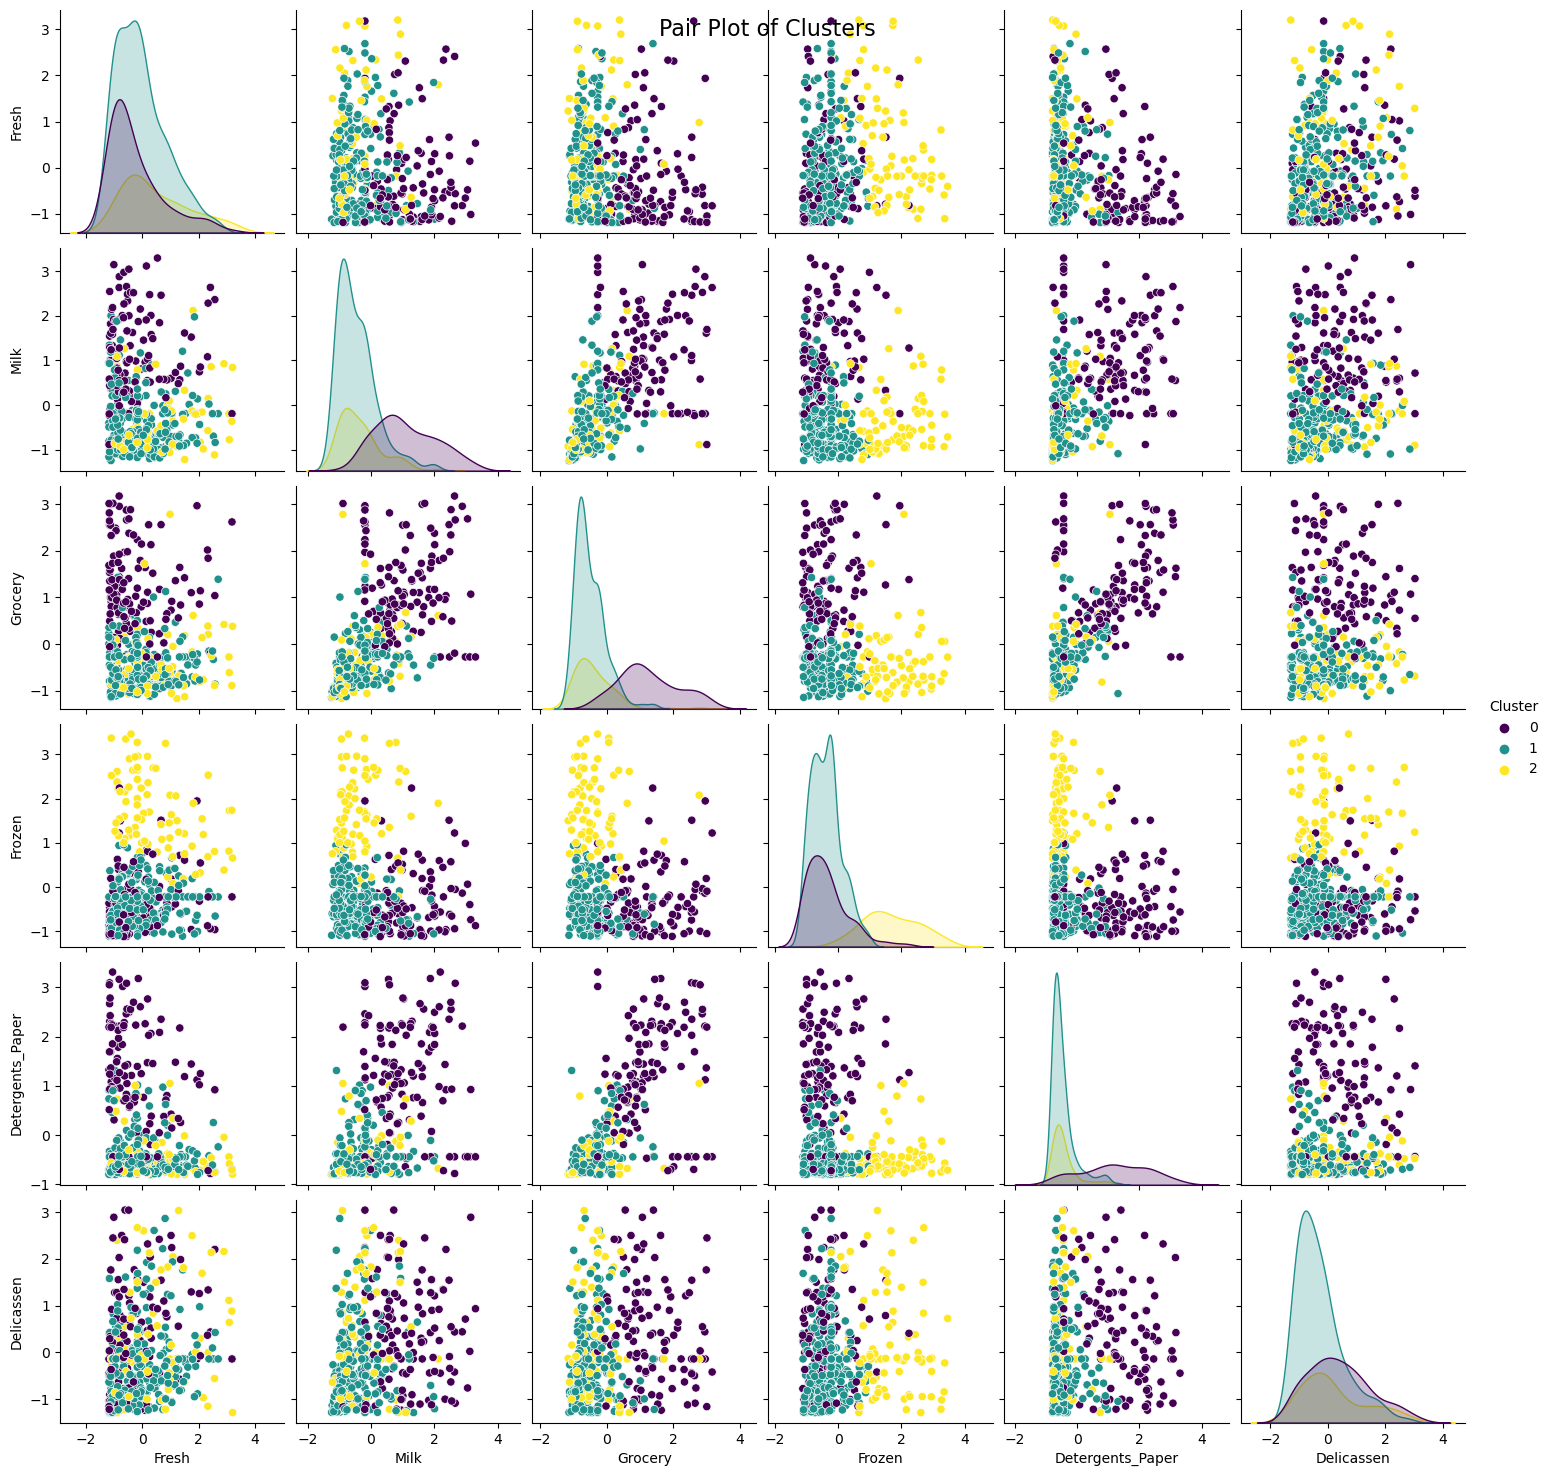

In [24]:
# visualize the clusters using a pair plot
df_scaled_with_clusters = pd.DataFrame(df_scaled, columns=numeric_cols)
df_scaled_with_clusters['Cluster'] = kmeans.labels_
sns.pairplot(df_scaled_with_clusters, hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of Clusters', fontsize=16)
plt.show()

### Interpretation of the Pair Plot

1. **Cluster 0 (Purple)**: 
   - Broad distribution in most variables, indicating diverse purchasing behavior.
   - Overlaps with Cluster 1 in most variables but generally lower than Cluster 2.

2. **Cluster 1 (Blue)**:
   - Similar to Cluster 0 but with slightly different peaks in some variables.
   - Lower values for most variables compared to Cluster 2.

3. **Cluster 2 (Yellow)**:
   - Higher values for Milk, Grocery, and Detergents_Paper, indicating high purchasing behavior in these categories.
   - Distinct from Clusters 0 and 1 in several variables, particularly in Milk, Grocery, and Detergents_Paper.

### Practical Implications:
- **Targeted Marketing**: 
  - Cluster 2 represents high-value customers who buy significant quantities of Milk, Grocery, and Detergents_Paper. Marketing efforts could focus on these products for this cluster.
  - Clusters 0 and 1 may require different strategies, potentially focusing on lower-value or more diverse product offerings.
- **Inventory Management**: 
  - Ensure higher stock levels for Milk, Grocery, and Detergents_Paper for Cluster 2.
  - Diverse inventory strategies for Clusters 0 and 1, considering their varied purchasing patterns.
- **Product Bundling**:
  - Products like Milk, Grocery, and Detergents_Paper can be bundled together for promotions targeting Cluster 2.
  - Different bundling strategies might be needed for Clusters 0 and 1 due to their diverse purchasing behavior.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [22]:
# compute the distance matrix
distance_matrix = pdist(df_scaled, metric='euclidean')
distance_matrix = squareform(distance_matrix)

In [26]:
# perform hierarchical clustering
Z = linkage(df_scaled, method='ward')

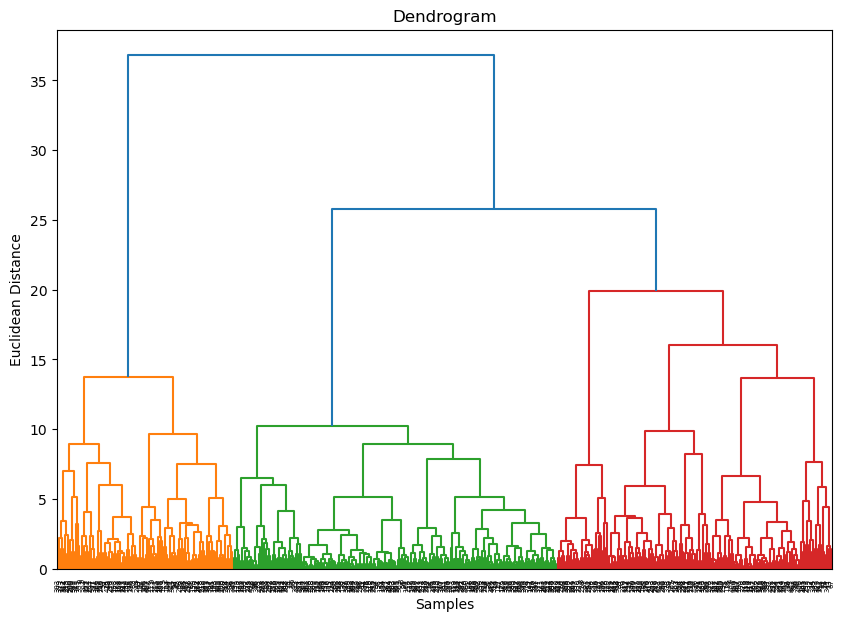

In [27]:
# plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

### Interpretation of the Dendrogram
- **Large Clusters**: At a high level (around a Euclidean distance of 35), the dendrogram indicates three main clusters (one orange, one green, and one red).
- **Sub-Clusters**: Within each main cluster, there are several sub-clusters. For example, within the orange cluster, there are multiple sub-clusters at different levels of similarity.
- **Cutoff Point**: By choosing a cutoff point (e.g., Euclidean distance of 15), a clear division into three main clusters is visible.

In [28]:
# choose the number of clusters
num_clusters = 3

# assign cluster labels
cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')

# add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

In [29]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561.0,214,2674.0,1338.0,1
1,2,3,7057,9810,9568.0,1762,3293.0,1776.0,1
2,2,3,6353,8808,7684.0,2405,3516.0,965.5,1
3,1,3,13265,1196,4221.0,6404,507.0,1788.0,3
4,2,3,22615,5410,7198.0,3915,1777.0,965.5,3


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [31]:
# perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

In [32]:
# create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [33]:
# add the PCA components to the original DataFrame
df['PC1'] = pca_df['PC1']
df['PC2'] = pca_df['PC2']
print("PCA Result (first 5 rows):\n", pca_df.head())

PCA Result (first 5 rows):
         PC1       PC2
0  1.375533  0.156069
1  1.793365  0.474858
2  1.264655 -0.080847
3 -1.406251  1.834049
4 -0.194076  1.440576


In [34]:
# analyze Principal Components
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

Explained variance by each principal component: [0.3968675  0.21581413]


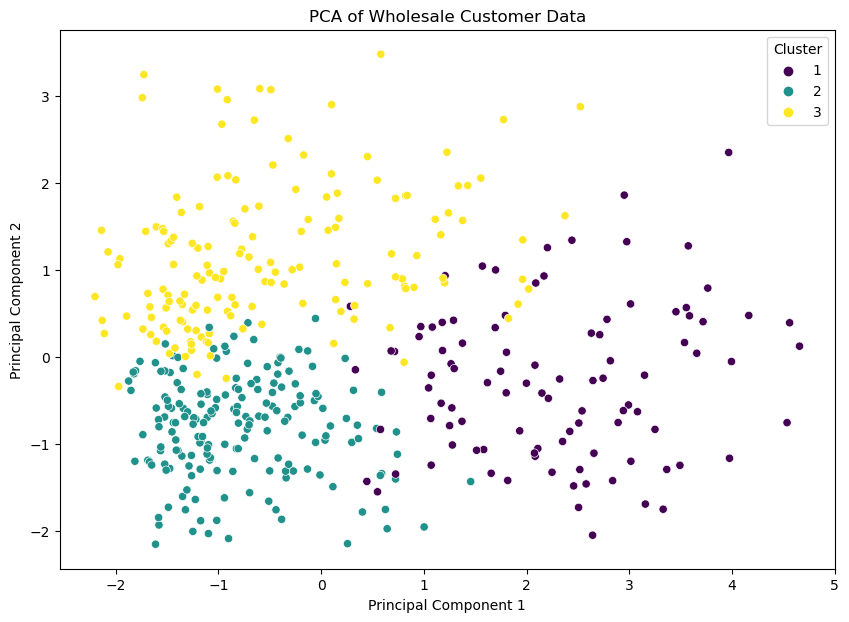

In [35]:
# visualize Principal Components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis')
plt.title('PCA of Wholesale Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Key Observations:

1. **Separation of Clusters**:
   - **Cluster 1 (Purple)**: Mostly positioned on the right side of the plot, extending from the center to the right. This indicates that Cluster 1 customers are distinguished by higher values in PC1.
   - **Cluster 2 (Teal)**: Mainly located in the bottom-left quadrant, indicating lower values in both PC1 and PC2.
   - **Cluster 3 (Yellow)**: Positioned in the upper-left quadrant, suggesting higher values in PC2 but lower values in PC1.

2. **Cluster Characteristics**:
   - **Cluster 1**: Customers in this cluster tend to have high values on PC1, which could correspond to higher overall spending or a specific purchasing pattern that is captured by the first principal component.
   - **Cluster 2**: These customers generally have low values on both PC1 and PC2, indicating lower spending or different purchasing patterns that distinguish them from the other clusters.
   - **Cluster 3**: This cluster has high values on PC2, indicating that the second principal component captures a different aspect of purchasing behavior that is significant for this group.

3. **Variance Explained**:
   - The spread of points along PC1 and PC2 shows the variance captured by these two components. PC1 captures the most variance, with PC2 capturing the second most. This means that these two components are the most significant in terms of differentiating customer purchasing behaviors.

4. **Overlap and Separation**:
   - There is some overlap between Clusters 2 and 3, especially near the center of the plot. This suggests that while the clusters are distinct, there are customers with purchasing patterns that are not as clearly separable by the first two principal components.
   - Cluster 1 is more clearly separated from Clusters 2 and 3, indicating that the first principal component is particularly effective in distinguishing these customers.

### Practical Implications:

1. **Targeted Marketing**:
   - **Cluster 1**: High spenders who can be targeted with premium product offerings and exclusive deals.
   - **Cluster 2**: Customers with lower overall spending who might respond well to discounts and budget-friendly promotions.
   - **Cluster 3**: Customers who have specific purchasing patterns (high PC2) and might be interested in specialized products.

2. **Inventory Management**:
   - **Cluster 1**: Ensure sufficient stock of high-demand items for these customers.
   - **Cluster 2**: Maintain a diverse but economical inventory.
   - **Cluster 3**: Stock products that align with the unique purchasing patterns of this group.

3. **Product Bundling**:
   - Use insights from PCA to create bundles that appeal to each cluster. For example, Cluster 1 might prefer premium bundles, while Cluster 2 might be interested in value packs.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. **Optimal Clustering**: The PCA and dendrogram analysis suggest that three distinct clusters (k=3) provide an optimal balance for customer segmentation, supported by the elbow method indicating a clear "elbow" at k=3. This clustering should be used for targeted marketing and personalized customer interactions.

2. **Customer Purchase Patterns**: The histograms and box plots reveal that most product categories exhibit right-skewed distributions, indicating that a majority of customers purchase low to moderate amounts, with a few making significantly higher purchases. This is particularly evident in Fresh, Milk, and Grocery products, which require careful stock management and bulk purchase strategies.

3. **Correlation and Product Bundling**: The heat map highlights strong positive correlations between Milk, Grocery, and Detergents_Paper purchases, suggesting these items are often bought together. Cross-promotional strategies and bundled offers can be designed to leverage these relationships, enhancing sales efficiency.

4. **Channel and Region Insights**: The categorical distribution of Channel and Region variables indicates distinct customer groups by sales channels and geographic locations. Tailoring inventory, marketing strategies, and product offerings to these segments can enhance customer satisfaction and operational efficiency.